In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dataset = pd.read_csv('/content/drive/My Drive/Machine Learning/Mentoria/datos/StanceDataset/train.csv', engine='python')

In [6]:
dataset

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,"@tedcruz And, #HandOverTheServer she wiped cle...",Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,Hillary is our best choice if we truly want to...,Hillary Clinton,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,@TheView I think our country is ready for a fe...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,I just gave an unhealthy amount of my hard-ear...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@PortiaABoulger Thank you for adding me to you...,Hillary Clinton,NONE,3. The tweet is not explicitly expressing opi...,pos
...,...,...,...,...,...
2909,"There's a law protecting unborn eagles, but no...",Legalization of Abortion,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
2910,I am 1 in 3... I have had an abortion #Abortio...,Legalization of Abortion,AGAINST,2. The tweet does NOT expresses opinion about ...,other
2911,How dare you say my sexual preference is a cho...,Legalization of Abortion,AGAINST,2. The tweet does NOT expresses opinion about ...,neg
2912,"Equal rights for those 'born that way', no rig...",Legalization of Abortion,AGAINST,2. The tweet does NOT expresses opinion about ...,neg


In [7]:
dataset.groupby(by=['Target', 'Stance']).count()

Tweet  Opinion Towards  Sentiment
Target                           Stance                                    
Atheism                          AGAINST    304              304        304
                                 FAVOR       92               92         92
                                 NONE       117              117        117
Climate Change is a Real Concern AGAINST     15               15         15
                                 FAVOR      212              212        212
                                 NONE       168              168        168
Feminist Movement                AGAINST    328              328        328
                                 FAVOR      210              210        210
                                 NONE       126              126        126
Hillary Clinton                  AGAINST    393              393        393
                                 FAVOR      118              118        118
                                 NONE       178              178        178
Legalization of Abortion         AGAINST    355              355        355
                                 FAVOR      121              121        121
                                 NONE       177              177        177

In [8]:
dataset.groupby(by='Sentiment').count()

,Tweet,Target,Stance,Opinion Towards
Sentiment,,,,
neg,1762,1762,1762,1762
other,189,189,189,189
pos,963,963,963,963


In [9]:
dataset.groupby(by='Opinion Towards').count()

,Tweet,Target,Stance,Sentiment
Opinion Towards,,,,
"1. The tweet explicitly expresses opinion about the target, a part of the target, or an aspect of the target.",1716,1716,1716,1716
2. The tweet does NOT expresses opinion about the target but it HAS opinion about something or someone other than the target.,1024,1024,1024,1024
"3. The tweet is not explicitly expressing opinion. (For example, the tweet is simply giving information.)",174,174,174,174


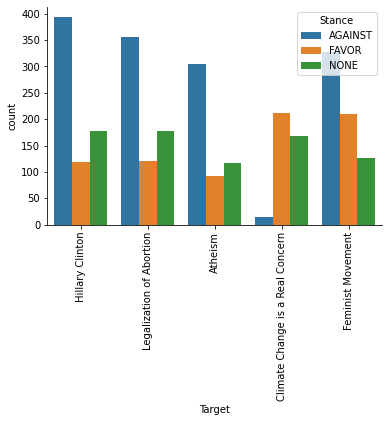

In [10]:
sns.countplot(data=dataset, x='Target', hue='Stance')
plt.xticks(rotation=90)
sns.despine()

In [11]:
ds_train = pd.read_csv('/content/drive/My Drive/Machine Learning/Mentoria/datos/StanceDataset/test.csv', engine='python')

In [12]:
ds_train

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,He who exalts himself shall be humbled; a...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
1,RT @prayerbullets: I remove Nehushtan -previou...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,other
2,@Brainman365 @heidtjj @BenjaminLives I have so...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
3,#God is utterly powerless without Human interv...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@David_Cameron Miracles of #Multiculturalism...,Atheism,AGAINST,2. The tweet does NOT expresses opinion about ...,neg
...,...,...,...,...,...
1951,@realDonaldTrump we all want you as the next p...,Donald Trump,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
1952,@RSherman_25 Join Twitter Trump brigade #oneth...,Donald Trump,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
1953,@JoeyBats19 Join Twitter Trump brigade #onetho...,Donald Trump,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
1954,Trump's outlandish statements is political str...,Donald Trump,AGAINST,1. The tweet explicitly expresses opinion abo...,neg


In [13]:
ds_feminism = pd.read_json('/content/drive/My Drive/Machine Learning/Mentoria/datos/feminism/export.json', lines=True)

In [14]:
normalizados_20 = pd.json_normalize(ds_feminism[:20]['tweet'])

In [24]:
normalizados_20.groupby(by='contributors')

In [15]:
ds_feminism.groupby(by='query').count()

,_id,tweet,user
query,,,
#YesAllWomen,567,567,567
#feminism,2519,2519,2519
#feminist,2410,2410,2410
#manly,129,129,129
#sexism,1277,1277,1277
#womanpower,307,307,307
anti-feminism,2182,2182,2182
anti-feminist,2527,2527,2527
anti-womanism,3,3,3


In [16]:
ds_normalizado = pd.json_normalize(ds_feminism['tweet'])

In [21]:
ds_normalizado.groupby(by='hashtags').count()

,created_at,id,id_str,full_text,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,metadata.iso_language_code,metadata.result_type,user.id,user.id_str,user.name,user.screen_name,user.location,user.description,user.url,user.entities.description.urls,user.protected,user.followers_count,user.friends_count,user.listed_count,user.created_at,...,extended_tweet.entities.user_mentions,extended_tweet.entities.symbols,place.id,place.url,place.place_type,place.name,place.full_name,place.country_code,place.country,place.bounding_box.type,place.bounding_box.coordinates,place.contained_within,extended_tweet.entities.media,extended_tweet.extended_entities.media,quoted_status.place.id,quoted_status.place.url,quoted_status.place.place_type,quoted_status.place.name,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,retweeted_status.geo.type,retweeted_status.geo.coordinates,retweeted_status.coordinates.type,retweeted_status.coordinates.coordinates,geo.type,geo.coordinates,coordinates.type,coordinates.coordinates,quoted_status.withheld_in_countries,withheld_in_countries,quoted_status.user.withheld_in_countries,quoted_status.scopes.followers,retweeted_status.quoted_status.withheld_in_countries,user.withheld_in_countries
truncated,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,90956,90956,90956,40560,43364,90956,8509,8509,8784,8784,8784,0,0,0,0,90956,90956,90956,90956,90956,90956,90956,90956,90956,90956,40560,40560,90956,90956,90956,90956,73608,83828,24133,40560,90956,90956,90956,90956,90956,...,0,0,450,450,450,450,450,450,450,450,450,290,0,0,218,218,218,218,218,218,218,34,218,218,1907,1907,9,9,9,9,45,45,45,45,5,6,2,2,1,1
True,9044,9044,9044,0,5322,9044,5394,5394,5507,5507,5507,0,0,0,0,9044,9044,9044,9044,9044,9044,9044,9044,9044,9044,0,0,9044,9044,9044,9044,6127,8076,2891,0,9044,9044,9044,9044,9044,...,9044,9044,189,189,189,189,189,189,189,189,189,0,622,622,29,29,29,29,29,29,29,0,29,29,248,248,0,0,0,0,5,5,5,5,0,1,0,0,0,0


Retweets - Mean RTs per tweet & top 5 RTed tweets

Likes - Mean likes per tweet & top 5 liked tweets

Impressions - Mean impressions per tweet & top 5 tweets with most impressions